**Importing libraries**

In [192]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

#machine learning models to implement 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


**Data preprocessing**

In [193]:
traindf =  pd.read_csv('../input/titanic/train.csv')
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [194]:
testdf = pd.read_csv('../input/titanic/test.csv')
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [195]:
combine = [traindf,testdf]

In [196]:
traindf.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

**Data visualization**

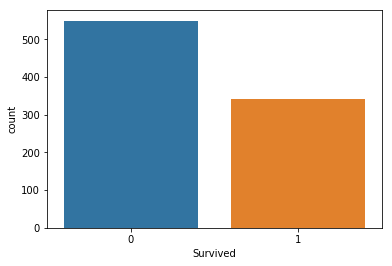

In [197]:
sns.countplot('Survived', data = traindf)

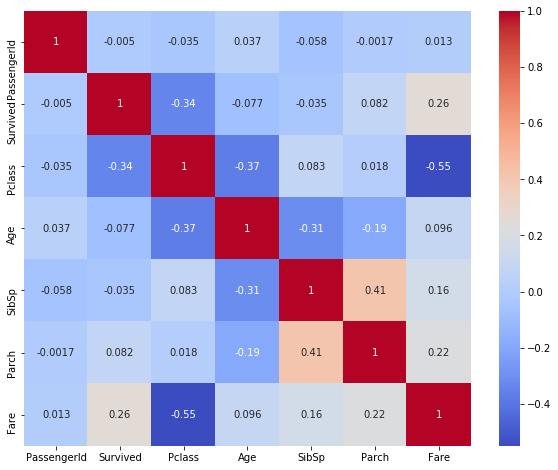

In [198]:
plt.figure(figsize=(10,8))
sns.heatmap(traindf.corr(), cmap='coolwarm',annot=True)

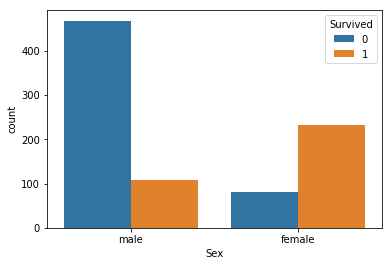

In [199]:
sns.countplot('Sex', hue = 'Survived', data = traindf)

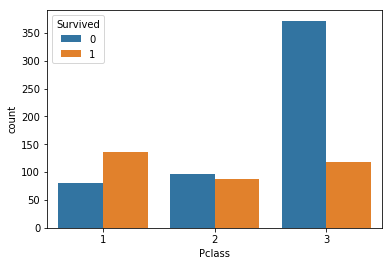

In [200]:
sns.countplot('Pclass', hue='Survived', data = traindf)

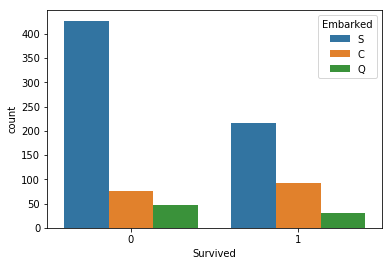

In [201]:
sns.countplot('Survived', hue='Embarked', data =traindf)

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


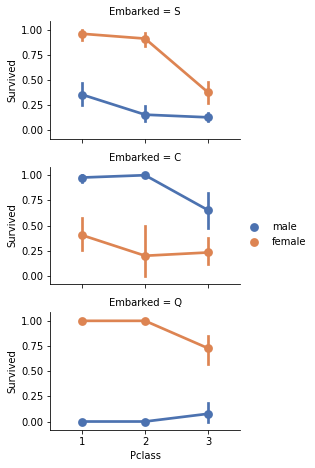

In [202]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(traindf, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

 **Feature engineering**

In [203]:
#dropping features 
print('Before', traindf.shape, testdf.shape, combine[0].shape, combine[1].shape)

traindf.drop(['Ticket','Cabin'], axis=1, inplace=True)
testdf.drop(['Ticket','Cabin'], axis=1 , inplace=True)
combine =[traindf,testdf]

print('After', traindf.shape, testdf.shape, combine[0].shape, combine[1].shape )

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [204]:
#CREATING A NEW FEATURE FROM EXISITING 
for dataset in combine : 
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
pd.crosstab(traindf['Title'],traindf['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


*Replacing titles with common name*

In [205]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    
traindf[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


*Convert categorical variables into ordinal*

In [206]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [207]:
traindf = traindf.drop(['Name', 'PassengerId'], axis=1)
testdf = testdf.drop(['Name'], axis=1)
combine = [traindf, testdf]
traindf.shape, testdf.shape

((891, 9), (418, 9))

In [208]:
#encoding categorical data 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
embark_mapping =  {"Q":1, "S":2, "C":3}
for dataset in combine:
    dataset['Sex'] = le.fit_transform(dataset['Sex'])
    dataset['Embarked'] = dataset['Embarked'].map(embark_mapping)
    dataset['Embarked'] = dataset['Embarked'].fillna(0)
    
traindf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,2.0,1
1,1,1,0,38.0,1,0,71.2833,3.0,3
2,1,3,0,26.0,0,0,7.9250,2.0,2
3,1,1,0,35.0,1,0,53.1000,2.0,3
4,0,3,1,35.0,0,0,8.0500,2.0,1


**Handling Missing values**

In [209]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
traindf[['Age']] = imputer.fit_transform(traindf[['Age']])
testdf[['Age']] = imputer.fit_transform(testdf[['Age']])

In [210]:
for dataset in combine:
    dataset.columns[dataset.isnull().any()]
    nanfare =  pd.isnull(dataset["Fare"])
dataset[nanfare]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
152,1044,3,1,60.5,0,0,NaN,2,1


In [211]:
for dataset in combine:
    dataset[['Fare']] = imputer.fit_transform(dataset[['Fare']])

In [212]:
dataset.columns[dataset.isnull().any()]

Index([], dtype='object')

In [213]:
traindf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,2.0,1
1,1,1,0,38.0,1,0,71.2833,3.0,3
2,1,3,0,26.0,0,0,7.9250,2.0,2
3,1,1,0,35.0,1,0,53.1000,2.0,3
4,0,3,1,35.0,0,0,8.0500,2.0,1


In [214]:
testdf.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,1,34.5,0,0,7.8292,1,1
1,893,3,0,47.0,1,0,7.0000,2,3
2,894,2,1,62.0,0,0,9.6875,1,1
3,895,3,1,27.0,0,0,8.6625,2,1
4,896,3,0,22.0,1,1,12.2875,2,3


**MODEL TRAINING**

In [215]:
X_train = traindf.drop("Survived", axis=1)
y_train = traindf["Survived"]
X_test = testdf.drop("PassengerId", axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [216]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [217]:
#LOGISTIC REGRESSION 
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred =  lr.predict(X_test)
acc_lr = round(lr.score(X_train,y_train)*100, 2)
acc_lr

81.26

In [218]:
coeff_df = pd.DataFrame(traindf.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(lr.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
7,Title,0.507555
5,Fare,0.201925
6,Embarked,0.065886
4,Parch,-0.189702
3,SibSp,-0.461892
2,Age,-0.494501
0,Pclass,-0.794573
1,Sex,-1.115583


*OBSERVATIONS::*
* Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
* Inversely as Pclass increases, probability of Survived=1 decreases the most.
* This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
* So is Title as second highest positive correlation.

In [219]:
#GAUSSIAN NAIVE BAYES 
gauss = GaussianNB()
gauss.fit(X_train, y_train)
y_pred =  gauss.predict(X_test)
acc_gauss = round(gauss.score(X_train,y_train)*100, 2)
acc_gauss

80.02

In [220]:
#PERCEPTRON
per = Perceptron()
per.fit(X_train,y_train)
y_pred = per.predict(X_test)
acc_per = round(per.score(X_train,y_train)*100, 2)
acc_per

77.78

In [221]:
#STOCHASTIC GRADIENT DESCENT
sgd = SGDClassifier()
sgd.fit(X_train,y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train,y_train)*100, 2)
acc_sgd

77.22

In [222]:
#K-Neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

87.43

In [223]:
#SUPPORT VECTOR MACHINES 
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

84.96

In [224]:
#RANDOM FOREST
ran =  RandomForestClassifier(n_estimators = 100)
ran.fit(X_train,y_train)
y_pred = ran.predict(X_test)
acc_ran = round(ran.score(X_train,y_train)*100, 2)
acc_ran

98.2

**MODEL EVALUATION**

In [225]:
models =  pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'GaussianNB',
              'Perceptron', 'Random Forest', 'K-Neighbors', 'SGD', 'Support Vector Machines'],
    'Score': [acc_lr, acc_knn, acc_gauss,
             acc_per, acc_ran, acc_knn, acc_sgd, acc_svc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,98.20
1,KNN,87.43
5,K-Neighbors,87.43
7,Support Vector Machines,84.96
0,Logistic Regression,81.26
2,GaussianNB,80.02
3,Perceptron,77.78
6,SGD,77.22


In [226]:
submission_df = pd.DataFrame
submission_df = pd.DataFrame({
    "PassengerId" : testdf["PassengerId"],
    "Survived" : y_pred
})

submission_df.PassengerId = submission_df.PassengerId.astype(int)
submission_df.Survived = submission_df.Survived.astype(int)
submission_df.to_csv('submission.csv', header=True, index=False)
submission_df.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
